# Load Libraries

In [1]:
# Install RPostgres if needed:
#install.packages("RPostgres")
#install.packages("tidyverse")

In [2]:
library(DBI)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Connect to DB, load data, clean data

In [7]:
con <- dbConnect(
    RPostgres::Postgres(),
    dbname = 'npm_data', 
    user = 'data_analyzer',
)

In [8]:
# This takes about 40 seconds to load (when running on the VM!), and takes about 4GB of memory
all_updates <- dbGetQuery(con, "
    SELECT 
        package_id, 
        from_id, 
        to_id, 
        (from_semver).major AS from_semver_major, 
        (from_semver).minor AS from_semver_minor, 
        (from_semver).bug AS from_semver_bug,
        (to_semver).major AS to_semver_major, 
        (to_semver).minor AS to_semver_minor, 
        (to_semver).bug AS to_semver_bug,
        from_created,
        to_created,
        ty
    FROM analysis.all_updates
")

In [9]:
all_updates$ty <- sapply(all_updates$ty, as.character)

In [12]:
head(all_updates)

,package_id,from_id,to_id,from_semver_major,from_semver_minor,from_semver_bug,to_semver_major,to_semver_minor,to_semver_bug,from_created,to_created,ty
,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<dttm>,<dttm>,<chr>
1,335,1,2,1,0,2,1,2,0,2016-12-10 03:59:44,2016-12-10 06:28:00,minor
2,335,2,3,1,2,0,1,2,1,2016-12-10 06:28:00,2016-12-10 16:48:25,bug
3,335,3,4,1,2,1,1,2,2,2016-12-10 16:48:25,2016-12-10 16:50:43,bug
4,335,4,5,1,2,2,1,2,3,2016-12-10 16:50:43,2016-12-10 17:03:01,bug
5,335,5,6,1,2,3,1,3,0,2016-12-10 17:03:01,2016-12-10 19:07:46,minor
6,335,6,7,1,3,0,1,4,0,2016-12-10 19:07:46,2016-12-10 19:59:41,minor


# Make plots!

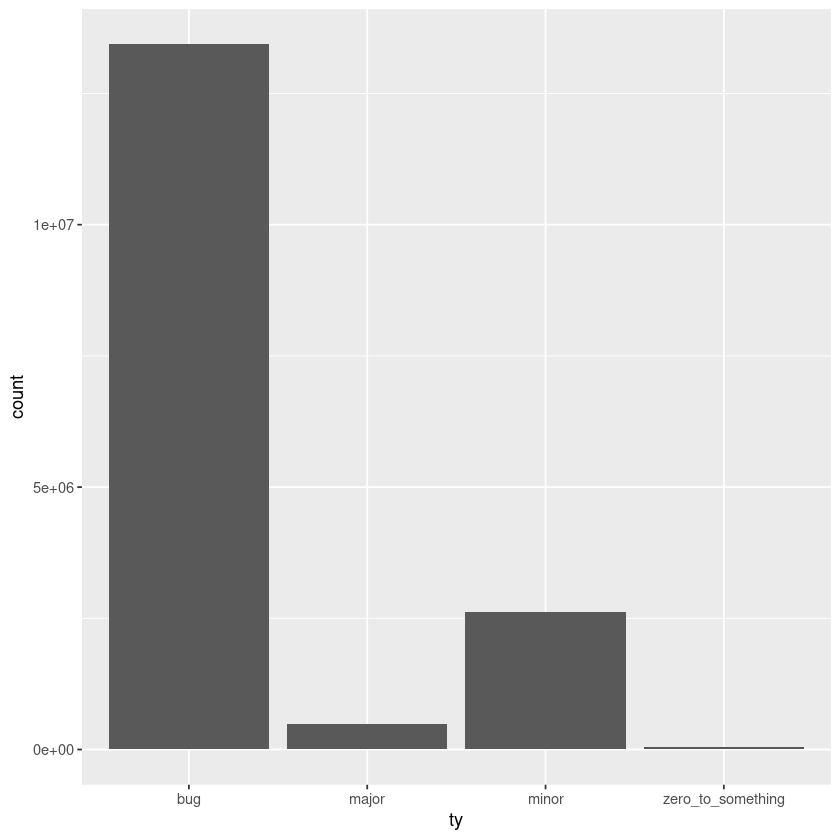

In [11]:
# Takes about 20 seconds
ggplot(data = all_updates, aes(x = ty)) +
    geom_bar()